# 2. Module Introduction

In the trading strategy explained in Module 1, random variables - MA50 and MA10 - help us make better predictions and decisions.

Such concepts are applied into different contexts in our daily lives.

#### Identify important variables in other contexts

## 2.1 Outcomes and Random Variables

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Dice game
# Rolling dice in python

die=pd.DataFrame([1,2,3,4,5,6])

sum_of_dice= die.sample(2, replace=True).sum().loc[0]
print('Sum of dice is', sum_of_dice)

Sum of dice is 7


In [14]:
# It is your turn! let's replace the none with the code of rolling three dice, instead of two

np.random.seed(1)  # This is for checking answer, do NOT modify this line of code

#Modify the code, replace the None
sum_of_three_dice = None

In [15]:
print('Sum of three dice is', sum_of_three_dice)

Sum of three dice is None


#### Mimic the roll dice game for multiple times

In [19]:
# The following code mimics the roll dice game for 50 times. And the results are all stored into "Result"
# Lets try and get the results of 50 sum of faces.

trial = 50
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [17]:
#print the first 10 results
print(result[:10])

[10, 6, 6, 7, 3, 11, 7, 8, 9, 9]


#### Frequency and Distributions

In [20]:
freq= pd.DataFrame(result)[0].value_counts() # count values
sort_freq= freq.sort_index() # sort index
sort_freq

3      2
4      6
5      5
6      6
7     10
8      9
9      5
10     3
11     3
12     1
Name: 0, dtype: int64

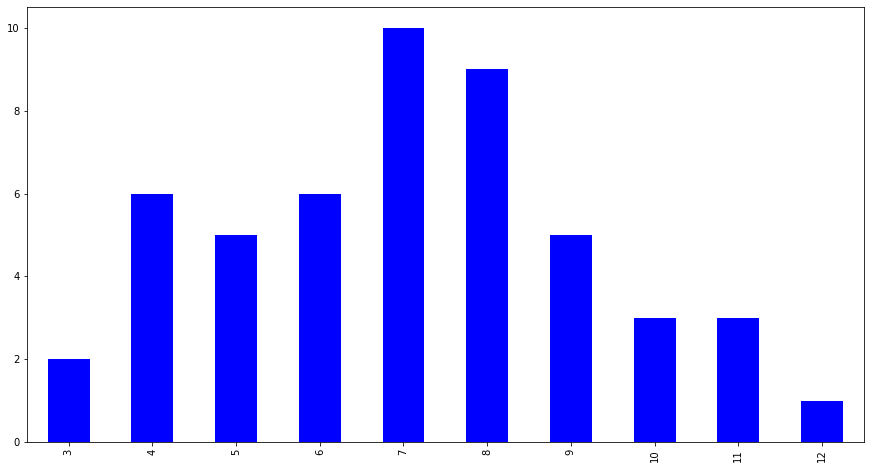

In [21]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

## 2.2 Relative Frequency

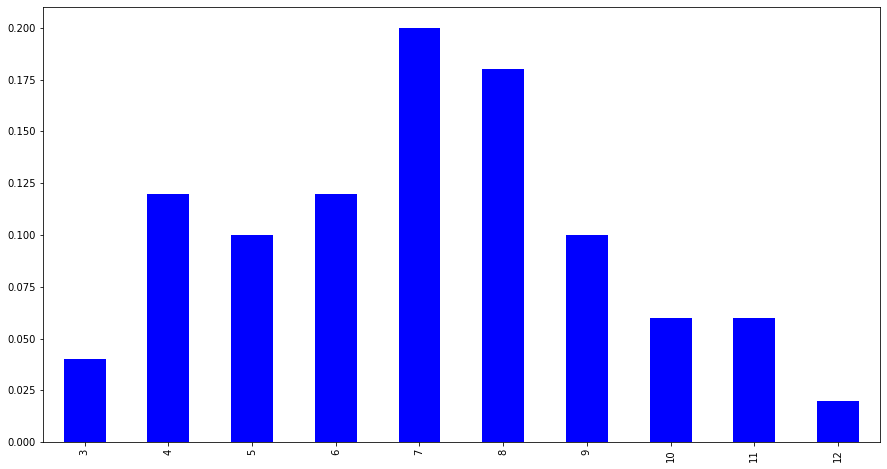

In [22]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

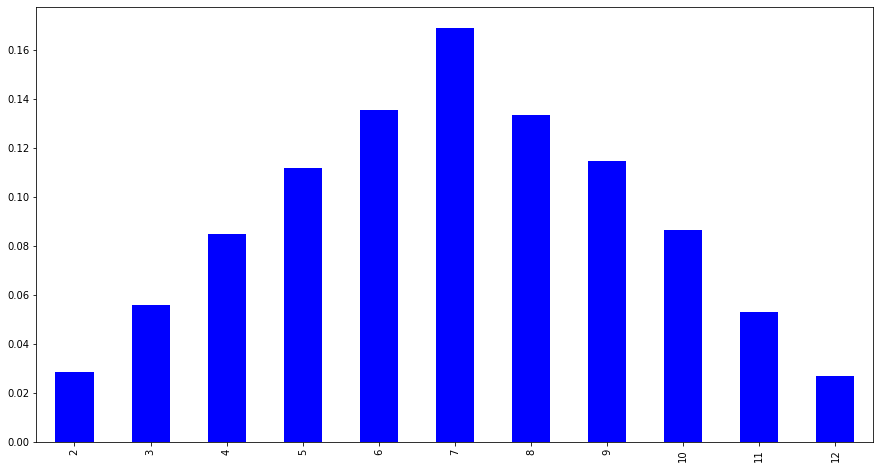

In [23]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

### Expectation and Variance of a distribution

In [24]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [25]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [26]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


### Empirical mean 经验均值 and variance

In [27]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [28]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.00865 5.805465450772894


## 2.3 Models of Distribution

**Models of Stock Return**
How to compute probability of yearly return and value at risk

In [29]:
aapl=pd.DataFrame.from_csv(r'C:\Users\Elva\Downloads\AAPL.csv')

C:\Users\Elva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


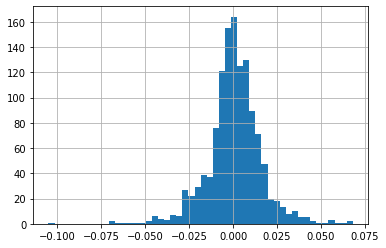

In [31]:
aapl['LogReturn']= np.log(aapl['Close']).shift(-1)-np.log(aapl['Close'])
aapl['LogReturn'].hist(bins=50)

Probability Density  Function (**pdf**) 概率密度函数

Cumulative  Distribution  Function (**cdf**) 累积分布函数

### Distribution of Log retrun

In [35]:
# let play around with ms data by calculating the log daily return
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])

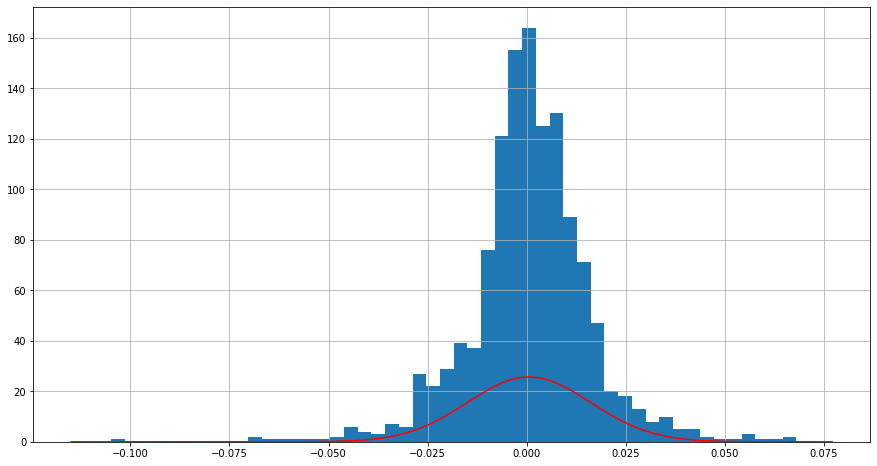

In [36]:
# Plot a histogram to show the distribution of log return of Apple's stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(aapl['LogReturn'].min()-0.01, aapl['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

aapl['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

### Calculate the probability of the stock price will drop over a certain percentage in a day

In [37]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.0005682298606039842


In [38]:
# Now is your turn, calculate the probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = None
print('The Probability is ', prob_return1)

The Probability is  None


### Calculate the probability of the stock price will drop over a certain percentage in a year

In [40]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.010717579373327816


In [47]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = None
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  None


## Calculate Value at risk (VaR)

In [43]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.024978347211594174
95% quantile  0.026163813073507167


In [48]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = None
print(q25)
# 75% quantile
q75 = None 

None
